# 0. Introduction

Ce notebook illustre l'effet du changement du poids attribué à la classe "Noise" dans une classification binaire "FR" versus "Noise" par un convolutional neural network.

Example: 
```
class_weight = {0:1.0, 1:5.0}

history = model.fit(
    data.x_train, data.y_train, 
    epochs=epochs,
    class_weight=class_weight#callbacks
)
```

In this case, every instance of **class 1 (Noise)** will be treated as 5 instances of **class 0 (FR)**.

# 1. Effects of CNN weights on Fast Ripples

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

path_list = []

path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-1base_detection_summary_20022023_12-57-46.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-1_detection_summary_20022023_15-25-00.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-2_detection_summary_20022023_15-02-13.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-5_detection_summary_20022023_11-28-06.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-10_detection_summary_20022023_11-45-32.xlsx")
                 
step1_db0 = []
step1_db5 = []
step1_db10 = []
step1_db15 = []

for path in path_list:       
 
    print("")
    print(path)
    df = pd.read_excel(path)
    print(df.keys())
    print("")

    nb_pass_step1 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_step2 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_both = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}

    n_lines = df.shape[0]

    for i in range(n_lines):
        p_step1 = False
        p_step1 = False
        dB = df["chan_name"][i].split("-")[1].replace(' SNR ', '').replace('dB ', "dB")

        if df["pass_step1"][i]:
            p_step1 = True
            nb_pass_step1[dB]+=1

        if df["pass_step2"][i]:
            p_step2 = True
            nb_pass_step2[dB]+=1

        if p_step1 and p_step2:
            nb_pass_both[dB]+=1
            
    step1_db0.append(nb_pass_step1["0dB"])
    step1_db5.append(nb_pass_step1["5dB"])
    step1_db10.append(nb_pass_step1["10dB"])
    step1_db15.append(nb_pass_step1["15dB"])

    print("0dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['0dB']}")
    print(f"Pass step 2: {nb_pass_step2['0dB']}")
    print("")

    print("5dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['5dB']}")
    print(f"Pass step 2: {nb_pass_step2['5dB']}")
    print("")

    print("10dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['10dB']}")
    print(f"Pass step 2: {nb_pass_step2['10dB']}")
    print("")

    print("15dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['15dB']}")
    print(f"Pass step 2: {nb_pass_step2['15dB']}")



/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-1base_detection_summary_20022023_12-57-46.xlsx
Index(['JSON-index', 'JSON-ID', 'chan_name', 'event_time', 'pass_step1',
       'pass_step2'],
      dtype='object')

0dB
------
Pass step 1: 181
Pass step 2: 123

5dB
------
Pass step 1: 1256
Pass step 2: 1031

10dB
------
Pass step 1: 1440
Pass step 2: 1436

15dB
------
Pass step 1: 1439
Pass step 2: 1437

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-1_detection_summary_20022023_15-25-00.xlsx
Index(['JSON-index', 'JSON-ID', 'chan_name', 'event_time', 'pass_step1',
       'pass_step2'],
      dtype='object')

0dB
------
Pass step 1: 179
Pass step 2: 123

5dB
------
Pass step 1: 1219
Pass step 2: 1031

10dB
------
Pass step 1: 1440
Pass step 2: 1436

15dB
------
Pass step 1: 1439
Pass step 2: 1437

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-2_detection_summary_20022023_15-02-13.xlsx
Index(['JSON-in

## 1.1. Sort by w (non-FR weight in the model)

In [8]:
w_1_1 = []
w_1_2 = []
w_2 = []
w_5 = []
w_10 = []

w_1_1.append(step1_db0[0])
w_1_1.append(step1_db5[0])
w_1_1.append(step1_db10[0])
w_1_1.append(step1_db15[0])

w_1_2.append(step1_db0[1])
w_1_2.append(step1_db5[1])
w_1_2.append(step1_db10[1])
w_1_2.append(step1_db15[1])

w_2.append(step1_db0[2])
w_2.append(step1_db5[2])
w_2.append(step1_db10[2])
w_2.append(step1_db15[2])

w_5.append(step1_db0[3])
w_5.append(step1_db5[3])
w_5.append(step1_db10[3])
w_5.append(step1_db15[3])

w_10.append(step1_db0[4])
w_10.append(step1_db5[4])
w_10.append(step1_db10[4])
w_10.append(step1_db15[4])

## 1.2. Plot results

                Weight 1 base (%)  Weight 1 new (%)  Weight 2 new (%)  \
0 dB (n=1440)           12.569444         12.430556          9.236111   
5 dB (n=1440)           87.222222         84.652778         80.972222   
10 dB (n=1440)         100.000000        100.000000         97.361111   
15 dB (n=1440)          99.930556         99.930556         97.916667   

                Weight 5 new (%)  Weight 10 new (%)  
0 dB (n=1440)           8.611111           4.097222  
5 dB (n=1440)          77.569444          67.916667  
10 dB (n=1440)         98.125000          99.722222  
15 dB (n=1440)         99.791667          99.930556  


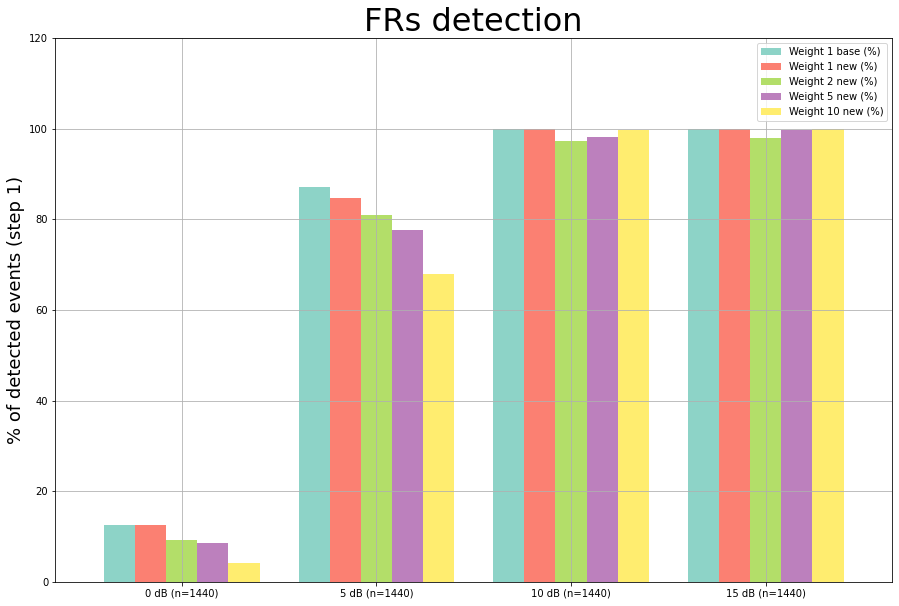

In [9]:
res_dict = {"Weight 1 base": np.array(w_1_1)/14.40,
           "Weight 1 new" : np.array(w_1_2)/14.40,
           "Weight 2 new" : np.array(w_2)/14.40,
           "Weight 5 new" : np.array(w_5)/14.40,
           "Weight 10 new" : np.array(w_10)/14.40,
          }

res_df = pd.DataFrame(res_dict, index = ["0 dB (n=1440)", "5 dB (n=1440)", "10 dB (n=1440)", "15 dB (n=1440)"])
print(res_df)


res_df.plot(kind='bar', figsize=(15,10), colormap='Set3', width=.8)
plt.title("FRs detection", fontsize = 32)
plt.ylabel("% of detected events (step 1)", fontsize=18)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.gca().xaxis.set_tick_params(rotation=0)
plt.ylim(0,120)
plt.grid()


# 2. Effects of CNN weights on Fast Ripples

In [10]:
import pandas as pd
import numpy as np

path_list = []

path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-1base_detection_summary_20022023_17-17-22.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-1_detection_summary_20022023_16-53-42.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-2_detection_summary_20022023_17-58-57.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-5_detection_summary_20022023_18-40-51.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-10_detection_summary_20022023_18-55-01.xlsx")

step1_db0 = []
step1_db5 = []
step1_db10 = []
step1_db15 = []

for path in path_list:       
 
    print("")
    print(path)
    df = pd.read_excel(path)
    print(df.keys())
    print("")

    nb_pass_step1 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_step2 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_both = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}

    n_lines = df.shape[0]

    for i in range(n_lines):
        p_step1 = False
        p_step1 = False
        dB = df["chan_name"][i].split("-")[1].replace(' SNR ', '').replace('dB ', "dB")

        if df["pass_step1"][i]:
            p_step1 = True
            nb_pass_step1[dB]+=1

        if df["pass_step2"][i]:
            p_step2 = True
            nb_pass_step2[dB]+=1

        if p_step1 and p_step2:
            nb_pass_both[dB]+=1
            
    step1_db0.append(nb_pass_step1["0dB"])
    step1_db5.append(nb_pass_step1["5dB"])
    step1_db10.append(nb_pass_step1["10dB"])
    step1_db15.append(nb_pass_step1["15dB"])

    print("0dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['0dB']}")
    print(f"Pass step 2: {nb_pass_step2['0dB']}")
    print("")

    print("5dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['5dB']}")
    print(f"Pass step 2: {nb_pass_step2['5dB']}")
    print("")

    print("10dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['10dB']}")
    print(f"Pass step 2: {nb_pass_step2['10dB']}")
    print("")

    print("15dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['15dB']}")
    print(f"Pass step 2: {nb_pass_step2['15dB']}")



/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-1base_detection_summary_20022023_17-17-22.xlsx
Index(['JSON-index', 'JSON-ID', 'chan_name', 'event_time', 'pass_step1',
       'pass_step2'],
      dtype='object')

0dB
------
Pass step 1: 86
Pass step 2: 96

5dB
------
Pass step 1: 91
Pass step 2: 102

10dB
------
Pass step 1: 90
Pass step 2: 102

15dB
------
Pass step 1: 92
Pass step 2: 113

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-1_detection_summary_20022023_16-53-42.xlsx
Index(['JSON-index', 'JSON-ID', 'chan_name', 'event_time', 'pass_step1',
       'pass_step2'],
      dtype='object')

0dB
------
Pass step 1: 77
Pass step 2: 96

5dB
------
Pass step 1: 91
Pass step 2: 102

10dB
------
Pass step 1: 84
Pass step 2: 102

15dB
------
Pass step 1: 88
Pass step 2: 113

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-2_detection_summary_20022023_17-58-57.xlsx
Index(['JSON-index', 'JSON-I

## 2.1. Sort by w (non-FR weight in the model)

In [11]:
w_1_1 = []
w_1_2 = []
w_2 = []
w_5 = []
w_10 = []

w_1_1.append(step1_db0[0])
w_1_1.append(step1_db5[0])
w_1_1.append(step1_db10[0])
w_1_1.append(step1_db15[0])

w_1_2.append(step1_db0[1])
w_1_2.append(step1_db5[1])
w_1_2.append(step1_db10[1])
w_1_2.append(step1_db15[1])

w_2.append(step1_db0[2])
w_2.append(step1_db5[2])
w_2.append(step1_db10[2])
w_2.append(step1_db15[2])

w_5.append(step1_db0[3])
w_5.append(step1_db5[3])
w_5.append(step1_db10[3])
w_5.append(step1_db15[3])

w_10.append(step1_db0[4])
w_10.append(step1_db5[4])
w_10.append(step1_db10[4])
w_10.append(step1_db15[4])

                Weight 1 base  Weight 1 new  Weight 2 new  Weight 5 new  \
0 dB (n=1440)        5.972222      5.347222      5.138889      5.486111   
5 dB (n=1440)        6.319444      6.319444      6.111111      6.041667   
10 dB (n=1440)       6.250000      5.833333      5.763889      5.694444   
15 dB (n=1440)       6.388889      6.111111      5.902778      6.041667   

                Weight 10 new  
0 dB (n=1440)        5.138889  
5 dB (n=1440)        5.694444  
10 dB (n=1440)       5.347222  
15 dB (n=1440)       5.625000  


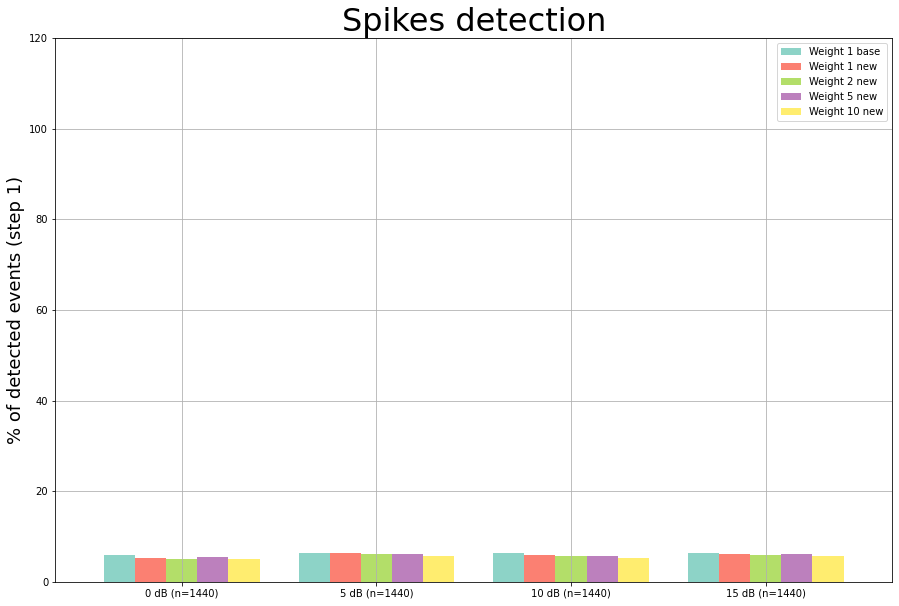

In [15]:
res_dict = {"Weight 1 base": np.array(w_1_1)/14.40,
           "Weight 1 new" : np.array(w_1_2)/14.40,
           "Weight 2 new" : np.array(w_2)/14.40,
           "Weight 5 new" : np.array(w_5)/14.40,
           "Weight 10 new" : np.array(w_10)/14.40,
          }

res_df = pd.DataFrame(res_dict, index = ["0 dB (n=1440)", "5 dB (n=1440)", "10 dB (n=1440)", "15 dB (n=1440)"])
print(res_df)

res_df.plot(kind='bar', figsize=(15,10), colormap='Set3', width=.8)
plt.title("Spikes detection", fontsize = 32)
plt.ylabel("% of detected events (step 1)", fontsize=18)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.gca().xaxis.set_tick_params(rotation=0)
plt.ylim(0,120)
plt.grid()